In [1]:

# bibliotheken importieren:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme()
# Ausführen, für den Fall, dass  Warnungen ignoriert werden sollen
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 35)        # alle Spalten anzeigen


In [2]:
# business,marketing,classification
# explorative datenanalyse, clustering --> einzelne cluster mit feature-charakteristiken, pca

# outliers bei "income" --> bei boxplots sichtbar
# features sinnvoll zusammenfassen (geamt_kampagnen)

df01 = pd.read_csv("marketing_campaign.csv",delimiter="\t")
df01_vis = pd.read_csv("marketing_campaign.csv",delimiter="\t")


In [3]:

df01.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [4]:

df01.shape


(2240, 29)

In [5]:
df01.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [6]:
df01.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [7]:
df01.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [8]:
df01["Income"].fillna(df01["Income"].mean(),inplace=True)
df01_vis["Income"].fillna(df01["Income"].mean(),inplace=True)

<Axes: xlabel='Response', ylabel='Income'>

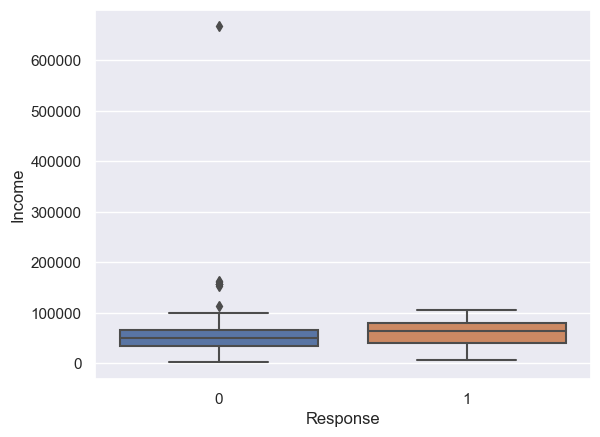

In [9]:
sns.boxplot(data=df01,x=df01["Response"],y=df01["Income"])

In [10]:
def ausr_income(x):
    if x > 110000:
        return df01["Income"].mean()
    else:
        return x

In [11]:
df01["Income"] = df01.Income.apply(ausr_income)
df01_vis["Income"] = df01_vis.Income.apply(ausr_income)

<Axes: xlabel='Response', ylabel='Income'>

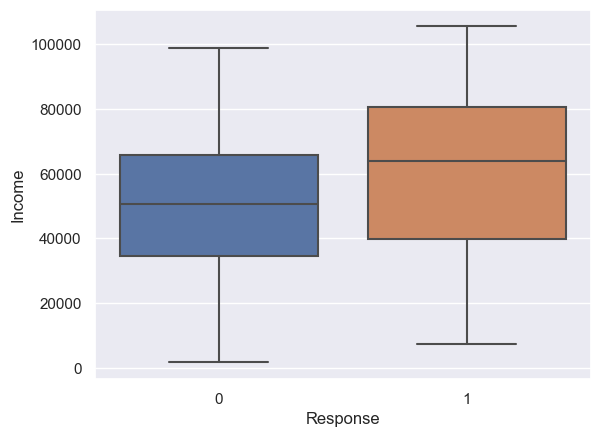

In [12]:
sns.boxplot(data=df01,x=df01["Response"],y=df01["Income"])

<Axes: xlabel='Response', ylabel='Year_Birth'>

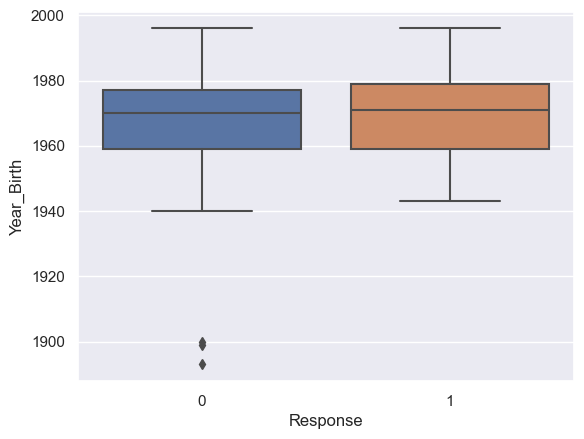

In [13]:
sns.boxplot(data=df01,x=df01["Response"],y=df01["Year_Birth"])

In [14]:
def ausr_Year_Birth(x):
    if x < 1938:
        return df01["Year_Birth"].mean()
    else:
        return x

In [15]:
df01["Year_Birth"] = df01.Year_Birth.apply(ausr_Year_Birth)
df01_vis["Year_Birth"] = df01_vis.Year_Birth.apply(ausr_Year_Birth)

<Axes: xlabel='Response', ylabel='Year_Birth'>

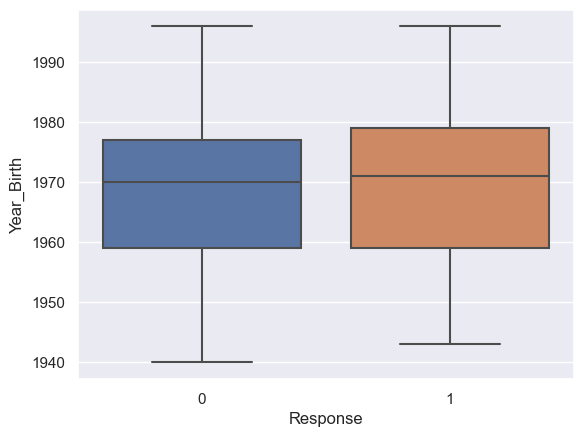

In [16]:
sns.boxplot(data=df01,x=df01["Response"],y=df01["Year_Birth"])

In [17]:
# neue Spalte mit Altersangabe, alte löschen:
df01["Age"] = 2023 - df01["Year_Birth"]
df01.drop("Year_Birth",axis=1,inplace=True)
df01_vis["Age"] = 2023 - df01_vis["Year_Birth"]
df01_vis.drop("Year_Birth",axis=1,inplace=True)

In [18]:
# neue spalte für Total_Campaigns_Accepted (target gesamt):
df01["AcceptedCmp_Total"] = df01["AcceptedCmp3"] + df01["AcceptedCmp4"] + df01["AcceptedCmp5"] + df01["AcceptedCmp1"] + df01["AcceptedCmp2"] + df01["Response"]
df01_vis["AcceptedCmp_Total"] = df01_vis["AcceptedCmp3"] + df01_vis["AcceptedCmp4"] + df01_vis["AcceptedCmp5"] + df01_vis["AcceptedCmp1"] + df01_vis["AcceptedCmp2"] + df01_vis["Response"]

In [19]:
df01

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,AcceptedCmp_Total
0,5524,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,66.0,1
1,2174,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,69.0,0
2,4141,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,58.0,0
3,6182,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,39.0,0
4,5324,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,42.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,56.0,0
2236,4001,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,77.0,1
2237,7270,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,42.0,1
2238,8235,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,67.0,0


In [20]:
df01.describe()

,ID,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,AcceptedCmp_Total
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000,2240.000000
mean,5592.159821,51614.954596,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107,54.098474,0.446875
std,3246.662198,20523.031693,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274,11.694076,0.890543
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,27.000000,0.000000
25%,2828.250000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,46.000000,0.000000
50%,5458.500000,51741.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,53.000000,0.000000
75%,8427.750000,67956.250000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,64.000000,1.000000
max,11191.000000,105471.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,83.000000,5.000000


In [20]:
# gesamtdatensatz bereinigt exportieren:
df01_vis.to_csv("marketing_campaign_vis.csv",index=False)

In [21]:
df01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2240 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   i

In [23]:
# nicht benötigte spalten löschen
df01.drop(["ID","Dt_Customer","Z_CostContact","Z_Revenue"],axis=1,inplace=True)
df01_vis.drop(["ID","Dt_Customer","Z_CostContact","Z_Revenue"],axis=1,inplace=True)

In [22]:
df01

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,AcceptedCmp_Total
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,66.0,1
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,69.0,0
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,58.0,0
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,39.0,0
4,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,42.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduation,Married,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,56.0,0
2236,PhD,Together,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,77.0,1
2237,Graduation,Divorced,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,42.0,1
2238,Master,Together,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,67.0,0


# kategorische werte in numerische

In [23]:
df01['Education'].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [24]:
df01["Marital_Status"].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [25]:
def mari(x):
    if x == "Absurd" or x == "YOLO" or x == "Alone":
        return 0
    if x == "Single":
        return 1
    if x == "Widow":
        return 2
    if x == "Divorced":
        return 3
    if x == "Together":
        return 4
    if x == "Married":
        return 5

In [26]:
df01["Marital_Status"] = df01["Marital_Status"].apply(mari)

In [27]:
def educ(x):
    if x == "Basic":
        return 0
    if x == "Graduation":
        return 1
    if x == "2n Cycle":
        return 2
    if x == "Master":
        return 3
    if x == "PhD":
        return 4


In [28]:
df01['Education'] = df01['Education'].apply(educ)

In [24]:
df01.nunique()

Education                 5
Marital_Status            8
Income                 1966
Kidhome                   3
Teenhome                  3
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Response                  2
Age                      57
AcceptedCmp_Total         6
dtype: int64

In [29]:
df01

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,AcceptedCmp_Total
0,1,1,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,66.0,1
1,1,1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,69.0,0
2,1,4,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,58.0,0
3,1,4,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,39.0,0
4,4,5,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,42.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1,5,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,56.0,0
2236,4,4,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,77.0,1
2237,1,3,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,42.0,1
2238,3,4,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,67.0,0


In [30]:
df01.shape

(2240, 26)

In [25]:
df01.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,AcceptedCmp_Total
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,51614.954596,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107,54.098474,0.446875
std,20523.031693,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274,11.694076,0.890543
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,0.000000
25%,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46.000000,0.000000
50%,51741.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53.000000,0.000000
75%,67956.250000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,64.000000,1.000000
max,105471.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,83.000000,5.000000


In [32]:
# correlationen:
df01.drop(["AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","AcceptedCmp1","AcceptedCmp2","Response"],axis=1).corr()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Age,AcceptedCmp_Total
Education,1.000000,0.012903,0.114504,-0.038017,0.102005,-0.025885,0.169076,-0.098455,0.004568,-0.106461,-0.102200,-0.121540,0.028999,0.063170,0.051224,0.062010,-0.034857,-0.039920,0.153679,0.051516
Marital_Status,0.012903,1.000000,-0.002038,0.011088,0.056618,-0.008141,0.003916,-0.018628,-0.032292,-0.026983,-0.013780,-0.022950,0.040899,0.014800,-0.004779,0.015950,0.013436,-0.008113,0.033592,-0.052838
Income,0.114504,-0.002038,1.000000,-0.526830,0.043259,0.007574,0.729705,0.537378,0.675895,0.551815,0.542997,0.414867,-0.127062,0.481313,0.677598,0.682698,-0.639735,-0.030214,0.208728,0.365659
Kidhome,-0.038017,0.011088,-0.526830,1.000000,-0.036133,0.008827,-0.496297,-0.372581,-0.437129,-0.387644,-0.370673,-0.349595,0.221798,-0.361647,-0.502237,-0.499683,0.447846,0.040207,-0.234008,-0.193419
Teenhome,0.102005,0.056618,0.043259,-0.036133,1.000000,0.016198,0.004846,-0.176764,-0.261160,-0.204187,-0.162475,-0.021725,0.387741,0.155500,-0.110769,0.050695,0.134884,0.003138,0.363140,-0.159110
Recency,-0.025885,-0.008141,0.007574,0.008827,0.016198,1.000000,0.016064,-0.004306,0.023056,0.001079,0.022670,0.016693,-0.001098,-0.010726,0.025110,0.000799,-0.021445,0.013231,0.019654,-0.088962
MntWines,0.169076,0.003916,0.729705,-0.496297,0.004846,0.016064,1.000000,0.389637,0.562667,0.399753,0.386581,0.387516,0.010940,0.542265,0.635226,0.642100,-0.320653,-0.039007,0.162914,0.489211
MntFruits,-0.098455,-0.018628,0.537378,-0.372581,-0.176764,-0.004306,0.389637,1.000000,0.543105,0.594804,0.567164,0.392995,-0.132114,0.296735,0.487917,0.461758,-0.418383,-0.005166,0.013728,0.172769
MntMeatProducts,0.004568,-0.032292,0.675895,-0.437129,-0.261160,0.023056,0.562667,0.543105,1.000000,0.568402,0.523846,0.350609,-0.122415,0.293761,0.723827,0.479659,-0.539470,-0.023483,0.030900,0.330172
MntFishProducts,-0.106461,-0.026983,0.551815,-0.387644,-0.204187,0.001079,0.399753,0.594804,0.568402,1.000000,0.579870,0.422875,-0.139361,0.293681,0.534478,0.459855,-0.446003,-0.020953,0.042500,0.180003


<Axes: >

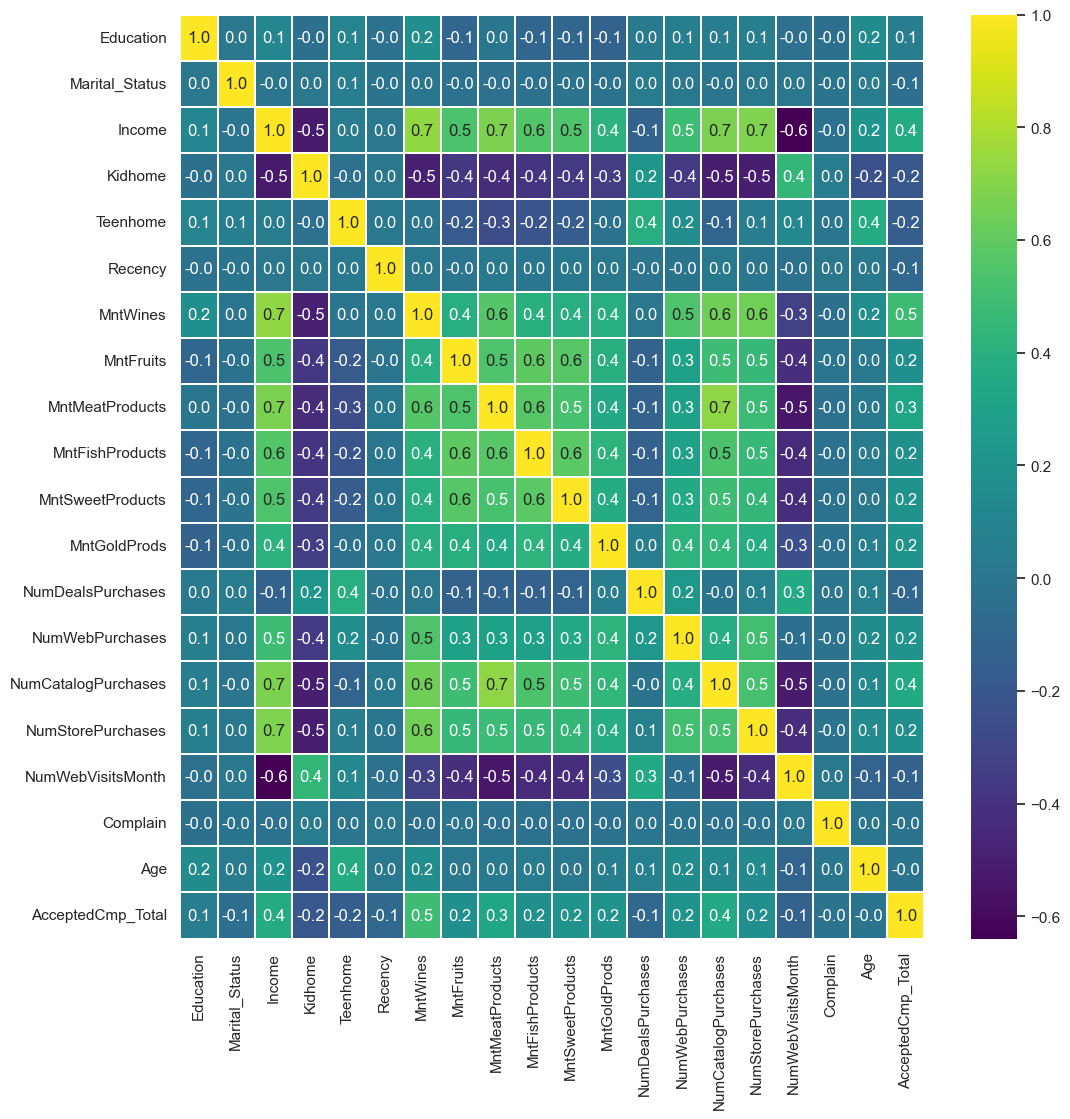

In [33]:
plt.figure(figsize=(12,12))
sns.heatmap(df01.drop(["AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","AcceptedCmp1","AcceptedCmp2","Response"],axis=1).corr(),cmap="viridis",linewidths=0.1,fmt=".1f",annot=True)

In [34]:
#correlation mit einzelner spalte, alte gelöscht und neue sortiert:
corr_accCmp_Total = df01.corr()[["AcceptedCmp_Total"]].round(2).sort_values(by=["AcceptedCmp_Total"],
                                ascending=False).drop(["AcceptedCmp_Total"]).reset_index()

In [35]:
corr_accCmp_Total

,index,AcceptedCmp_Total
0,Response,0.72
1,AcceptedCmp5,0.68
2,AcceptedCmp1,0.64
3,AcceptedCmp4,0.54
4,MntWines,0.49
5,AcceptedCmp3,0.43
6,AcceptedCmp2,0.42
7,Income,0.37
8,NumCatalogPurchases,0.35
9,MntMeatProducts,0.33


In [36]:
#WICHTIGE KORRELATIONEN:

#KORRELATION 0.7:

#* Income           -    MntWines
#* Income           -    MntMeatProducts
#* Income           -    NumCatalogPurchases
#* Income           -    NumStorePurchases
#* MntMeatProducts  -    NumCatalogPurchases

#KORRELATION 0.6:

#* MntWines          -   MntMeatProducts
#* MntWines          -   NumCatalogPurchases
#* MntWines          -   NumCatalogStore
#* MntFruits         -   MntFishProducts
#* MntFruits         -   MntSweetProducts
#* MntMeatProducts   -   MntFish
#* MntFish           -   MntSweetProducts

#HÖCHSTE KORRELATIONEN MIT DEM LABEL AcceptedCmp_Total:
    
#* Response         -   AcceptedCmp_Total     0.72
#* AcceptedCmp5     -   AcceptedCmp_Total     0.68
#* AcceptedCmp1     -   AcceptedCmp_Total     0.64
#* AcceptedCmp4     -   AcceptedCmp_Total     0.54
#* MntWines         -   AcceptedCmp_Total     0,49
#* AcceptedCmp3     -   AcceptedCmp_Total     0.43
#* AcceptedCmp2     -   AcceptedCmp_Total     0.42
#* Income           -   AcceptedCmp_Total     0.36
#* MntMeatProducts  -   AcceptedCmp_Total     0.33

# visualisierungen

<Axes: xlabel='Age'>

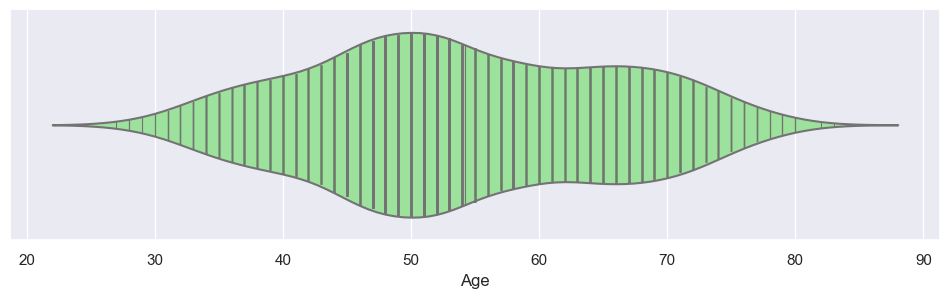

In [37]:
plt.figure(figsize=(12,3))
sns.violinplot(data=df01,x="Age",inner="stick",color="lightgreen")

<Axes: xlabel='Income', ylabel='Count'>

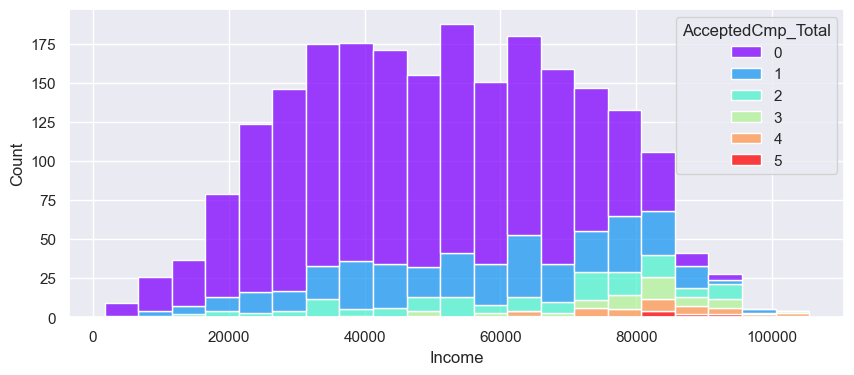

In [38]:
plt.figure(figsize=(10,4))
sns.histplot(data=df01,x="Income",hue="AcceptedCmp_Total",multiple="stack",palette="rainbow")

<Axes: ylabel='Count'>

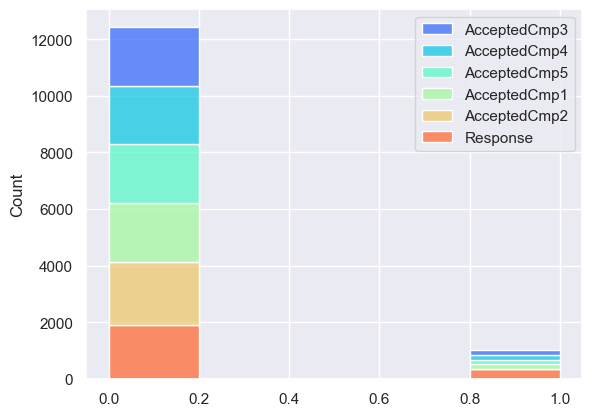

In [39]:
# erfolg der campaigns:
sns.histplot(data=df01[["AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","AcceptedCmp1","AcceptedCmp2","Response"]],palette="rainbow",bins=5,multiple="stack")

Text(0.5, 1.0, 'Web')

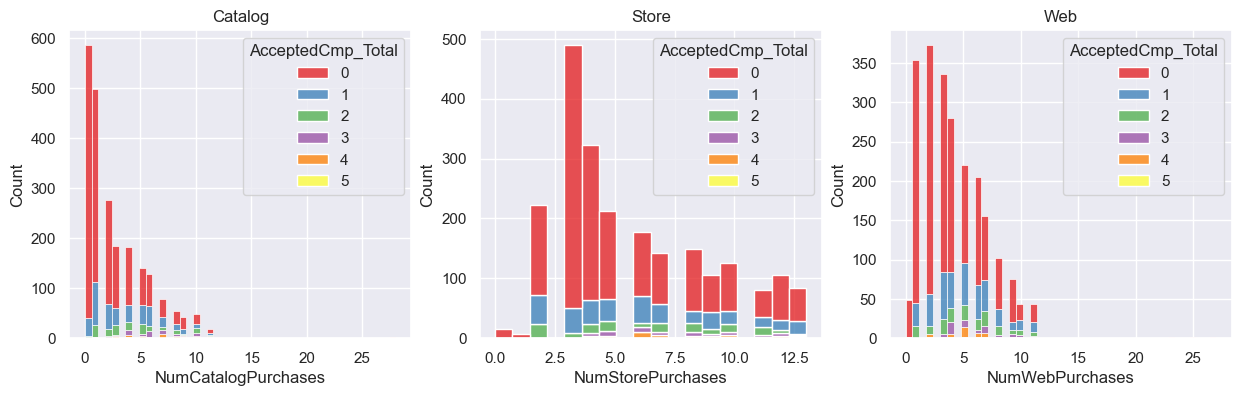

In [40]:
# vergleich der unterschiedlichen verkaufsarten:
fig, axes = plt.subplots(1, 3,  figsize=(15, 4))
sns.histplot(data=df01_vis, x="NumCatalogPurchases", hue="AcceptedCmp_Total", multiple="stack", palette="Set1",ax=axes[0])
axes[0].set_title("Catalog")
sns.histplot(data=df01_vis, x="NumStorePurchases", hue="AcceptedCmp_Total", multiple="stack", palette="Set1", ax=axes[1])
axes[1].set_title('Store')
sns.histplot(data=df01_vis, x="NumWebPurchases", hue="AcceptedCmp_Total", multiple="stack", palette="Set1", ax=axes[2])
axes[2].set_title('Web')

# supervised learning

In [41]:
# mit allen features
# PCA reduziert

In [42]:
df01.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Age', 'AcceptedCmp_Total'],
      dtype='object')

In [43]:
# train-test-split
X01 = df01.drop(["Response","AcceptedCmp_Total"],axis=1)
#         (target = 6.campaign statt 1.campaign --> bessere vorhersagen!!)
y01 = df01["Response"]

In [44]:
X01.shape

(2240, 24)

In [45]:
y01.shape

(2240,)

In [46]:

# train-/test-daten:
from sklearn.model_selection import train_test_split


In [47]:
X01_train, X01_test, y01_train, y01_test = train_test_split(X01, y01, test_size=0.2, random_state=33)

In [48]:
# alle X-daten standardisieren:
from sklearn.preprocessing import StandardScaler

In [49]:
scaler = StandardScaler()

In [50]:
X01_train = scaler.fit_transform(X01_train)
X01_test = scaler.fit_transform(X01_test)

In [51]:
# algorithmen: LogReg,KNeighbor(elbow),SVC(c/gamma-->gridsearch),naiveBayes,randomRorest

In [52]:
# algorithmen importieren:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

#initialisieren:
log = LogisticRegression()
knc = KNeighborsClassifier()
nab = GaussianNB()
rfc = RandomForestClassifier()
svc = SVC()

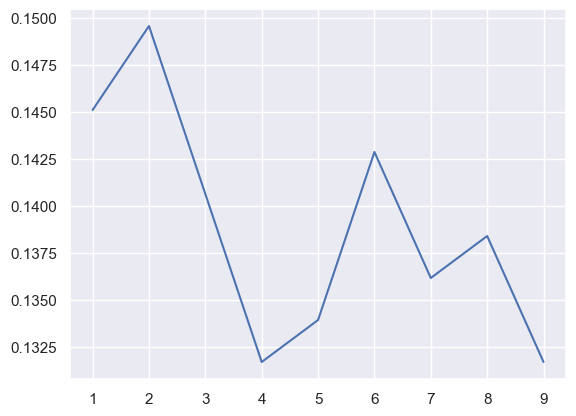

In [53]:
# elbow method:
fehler = []
for k in range(1,10):
    knc = KNeighborsClassifier(n_neighbors=k)
    knc.fit(X01_train,y01_train)
    predictions_k = knc.predict(X01_test)
    fehler.append(np.mean(predictions_k != y01_test))
plt.plot(range(1,10),fehler)
#                               wählen  --> k = 4!

In [54]:
#beste werte für C und gamma (SVC,hyperebenen):
hyper_para = {"C":[0.1,1,10,100,1000],"gamma":[1,0.1,0.01,0.001,0.0001]}
# initialisieren von Gridsearch
grid = GridSearchCV(SVC(),hyper_para,refit=True)
grid.fit(X01_train,y01_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]})

In [55]:
grid.best_params_

{'C': 100, 'gamma': 0.001}

In [56]:
# neu initialisieren nach "elbow" und "C/gamma" und trainieren:
log = LogisticRegression().fit(X01_train,y01_train)
knc = KNeighborsClassifier(n_neighbors=4).fit(X01_train,y01_train)
nab = GaussianNB().fit(X01_train,y01_train)
rfc = RandomForestClassifier(n_estimators=1000,random_state=33).fit(X01_train,y01_train)
svc = SVC(C=100,gamma=0.001).fit(X01_train,y01_train)

In [57]:
# vorhersagen:
pred_log = log.predict(X01_test)
pred_knc = knc.predict(X01_test)
pred_nab = nab.predict(X01_test)
pred_rfc = rfc.predict(X01_test)
pred_svc = svc.predict(X01_test)

In [58]:
# bibliotheken für reports
from sklearn.metrics import accuracy_score,confusion_matrix,mean_absolute_error,classification_report

In [59]:
print("LogReg      : {:.2f} %".format(accuracy_score(y01_test,pred_log)*100))
print("KNeighbor   : {:.2f} %".format(accuracy_score(y01_test,pred_knc)*100))
print("NaiveBayes  : {:.2f} %".format(accuracy_score(y01_test,pred_nab)*100))
print("RandomForest: {:.2f} %".format(accuracy_score(y01_test,pred_rfc)*100))
print("SVC         : {:.2f} %".format(accuracy_score(y01_test,pred_svc)*100))

LogReg      : 88.39 %
KNeighbor   : 86.83 %
NaiveBayes  : 83.04 %
RandomForest: 86.38 %
SVC         : 87.72 %


In [60]:
# reports

In [61]:
#models in liste speichern:
models = [log,knc,nab,rfc,svc]
model_names = ["LogisticRegression","KNeighborsClassifier","NaiveBayes","RandomForestClassifier","SVC"]
# über for schleife werte in listen speichern:
accuracy_scores = []
precision_scores = []
recall_scores = []
error_rate = []


for i,m in enumerate(models):
    y_pred = m.predict(X01_test)
    conf_matrix = confusion_matrix(y01_test,y_pred)
    
    print(model_names[i])
    print(classification_report(y01_test,y_pred))
    
    true_positiv = conf_matrix[0,0]
    true_negativ = conf_matrix[1,1]
    false_positiv = conf_matrix[0,1]
    false_negativ = conf_matrix[1,0]
    
    # werte: "accuracy","precision","recall","error"
    total = true_positiv + true_negativ + false_positiv + false_negativ
    accuracy = (true_positiv + true_negativ) / total
    precision = true_positiv / (true_positiv + false_positiv)
    recall = true_positiv / (true_positiv + false_negativ)
    error = (false_positiv + false_negativ) / total
    
    accuracy_scores.append(accuracy.round(2))
    precision_scores.append(precision.round(2))
    recall_scores.append(recall.round(2))
    error_rate.append(error.round(2))

# tabelle erzeugen mit den Listen der einzelnen werte:
ergebnisse_df01 = pd.DataFrame(list(zip(accuracy_scores,precision_scores,recall_scores,error_rate)),
                            index=model_names,columns=["accuracy","precision","recall","error"])

ergebnisse_df01

LogisticRegression
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       373
           1       0.78      0.43      0.55        75

    accuracy                           0.88       448
   macro avg       0.84      0.70      0.74       448
weighted avg       0.88      0.88      0.87       448

KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       373
           1       0.81      0.28      0.42        75

    accuracy                           0.87       448
   macro avg       0.84      0.63      0.67       448
weighted avg       0.86      0.87      0.84       448

NaiveBayes
              precision    recall  f1-score   support

           0       0.90      0.89      0.90       373
           1       0.49      0.53      0.51        75

    accuracy                           0.83       448
   macro avg       0.70      0.71      0.71       448
weighted avg       0.84

,accuracy,precision,recall,error
LogisticRegression,0.88,0.98,0.89,0.12
KNeighborsClassifier,0.87,0.99,0.87,0.13
NaiveBayes,0.83,0.89,0.90,0.17
RandomForestClassifier,0.86,0.99,0.87,0.14
SVC,0.88,0.99,0.88,0.12


Text(0.5, 1.0, 'SVC')

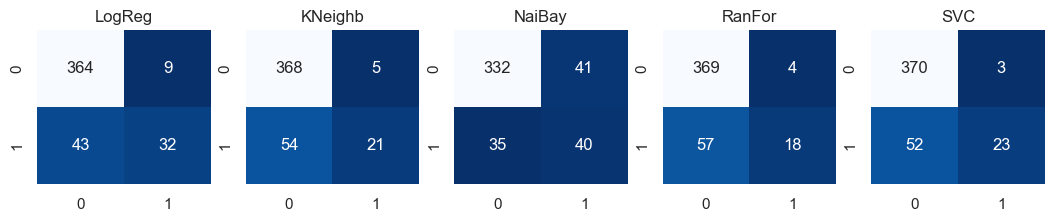

In [62]:
fig,axis = plt.subplots(1,5,figsize=(13,2))

sns.heatmap(confusion_matrix(y01_test,pred_log),cbar = False,cmap="Blues_r",annot=True,fmt=".0f",ax=axis[0])
axis[0].set_title("LogReg")
sns.heatmap(confusion_matrix(y01_test,pred_knc),cbar = False,cmap="Blues_r",annot=True,fmt=".0f",ax=axis[1])
axis[1].set_title("KNeighb")
sns.heatmap(confusion_matrix(y01_test,pred_nab),cbar = False,cmap="Blues_r",annot=True,fmt=".0f",ax=axis[2])
axis[2].set_title("NaiBay")
sns.heatmap(confusion_matrix(y01_test,pred_rfc),cbar = False,cmap="Blues_r",annot=True,fmt=".0f",ax=axis[3])
axis[3].set_title("RanFor")
sns.heatmap(confusion_matrix(y01_test,pred_svc),cbar = False,cmap="Blues_r",annot=True,fmt=".0f",ax=axis[4])
axis[4].set_title("SVC")

In [63]:
# mit PCA auf die aussagekräftigen components reduzieren, um sie für kmeans clustering effektiv zu nutzen
# reduzieren der daten mit PCA:
from sklearn.decomposition import PCA

In [64]:
X02 = df01.drop(["Response","AcceptedCmp_Total"],axis=1)

In [65]:
X02.shape

(2240, 24)

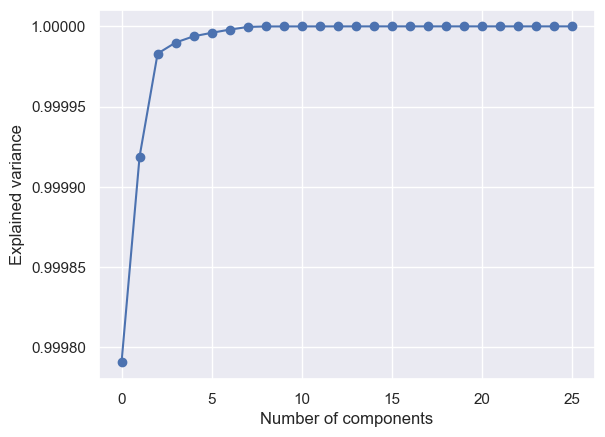

In [66]:
# überprüfung mit ursprünglichem datensatz, wie viele components wichtig sind:
pca_check = PCA(n_components=26,random_state=33)
pca_check.fit(df01)
plt.plot(np.cumsum(pca_check.explained_variance_ratio_),marker="o")
plt.xlabel("Number of components")
plt.ylabel("Explained variance")
plt.show()

In [67]:
for i,value in enumerate(pca_check.explained_variance_ratio_):
    print(f"{i+1}. Principal Component erklärt {value*100:.4f}% der Varianz ")

1. Principal Component erklärt 99.9790% der Varianz 
2. Principal Component erklärt 0.0128% der Varianz 
3. Principal Component erklärt 0.0064% der Varianz 
4. Principal Component erklärt 0.0007% der Varianz 
5. Principal Component erklärt 0.0004% der Varianz 
6. Principal Component erklärt 0.0002% der Varianz 
7. Principal Component erklärt 0.0002% der Varianz 
8. Principal Component erklärt 0.0002% der Varianz 
9. Principal Component erklärt 0.0000% der Varianz 
10. Principal Component erklärt 0.0000% der Varianz 
11. Principal Component erklärt 0.0000% der Varianz 
12. Principal Component erklärt 0.0000% der Varianz 
13. Principal Component erklärt 0.0000% der Varianz 
14. Principal Component erklärt 0.0000% der Varianz 
15. Principal Component erklärt 0.0000% der Varianz 
16. Principal Component erklärt 0.0000% der Varianz 
17. Principal Component erklärt 0.0000% der Varianz 
18. Principal Component erklärt 0.0000% der Varianz 
19. Principal Component erklärt 0.0000% der Varianz 
2

In [68]:
#standardscaler:
scaled_X02 = scaler.fit_transform(X02)

In [69]:
# 1 principal component --> initialisieren:
pca = PCA(n_components=2,random_state=33)

In [70]:
# trainieren und transformieren:
x_pca = pca.fit_transform(scaled_X02)

In [71]:
x_pca.shape

(2240, 2)

# unsupervised learning --> KMeans Clustering

In [72]:
# k_mean importieren:
from sklearn.cluster import KMeans

In [73]:
# elbow method mit gesamten datensatz (mit allen campaigns + response):
#             --> inertias (distanzen bzw. fehler)
kmeans_k = [KMeans(n_clusters=k, random_state=33).fit(df01) for k in range(1, 11)]
inertias = [model.inertia_ for model in kmeans_k]

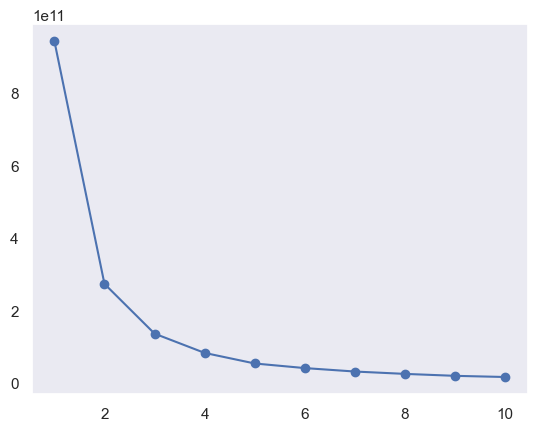

In [74]:
# visualisieren:
plt.grid()
plt.plot(range(1, 11),inertias,"bo-")

In [75]:
# k wählen: --> 2

# trainieren mit k von elbow-method gewählt 2:
km01 = KMeans(n_clusters=2,random_state=33)
pred_km01 = km01.fit_predict(x_pca)

# neues label mit den vorhergesagten clustern:
df01["Label"] = pred_km01

In [76]:
df01.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Age', 'AcceptedCmp_Total', 'Label'],
      dtype='object')

<Axes: xlabel='Label', ylabel='Age'>

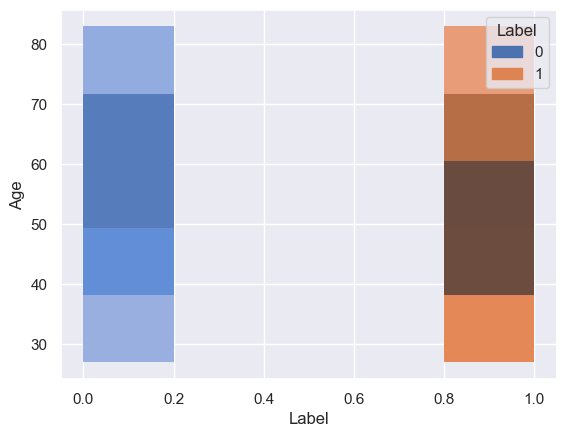

In [77]:
sns.histplot(x=df01["Label"],y=df01["Age"],kde=True,hue=df01["Label"],bins=5)

<Axes: xlabel='NumCatalogPurchases', ylabel='Label'>

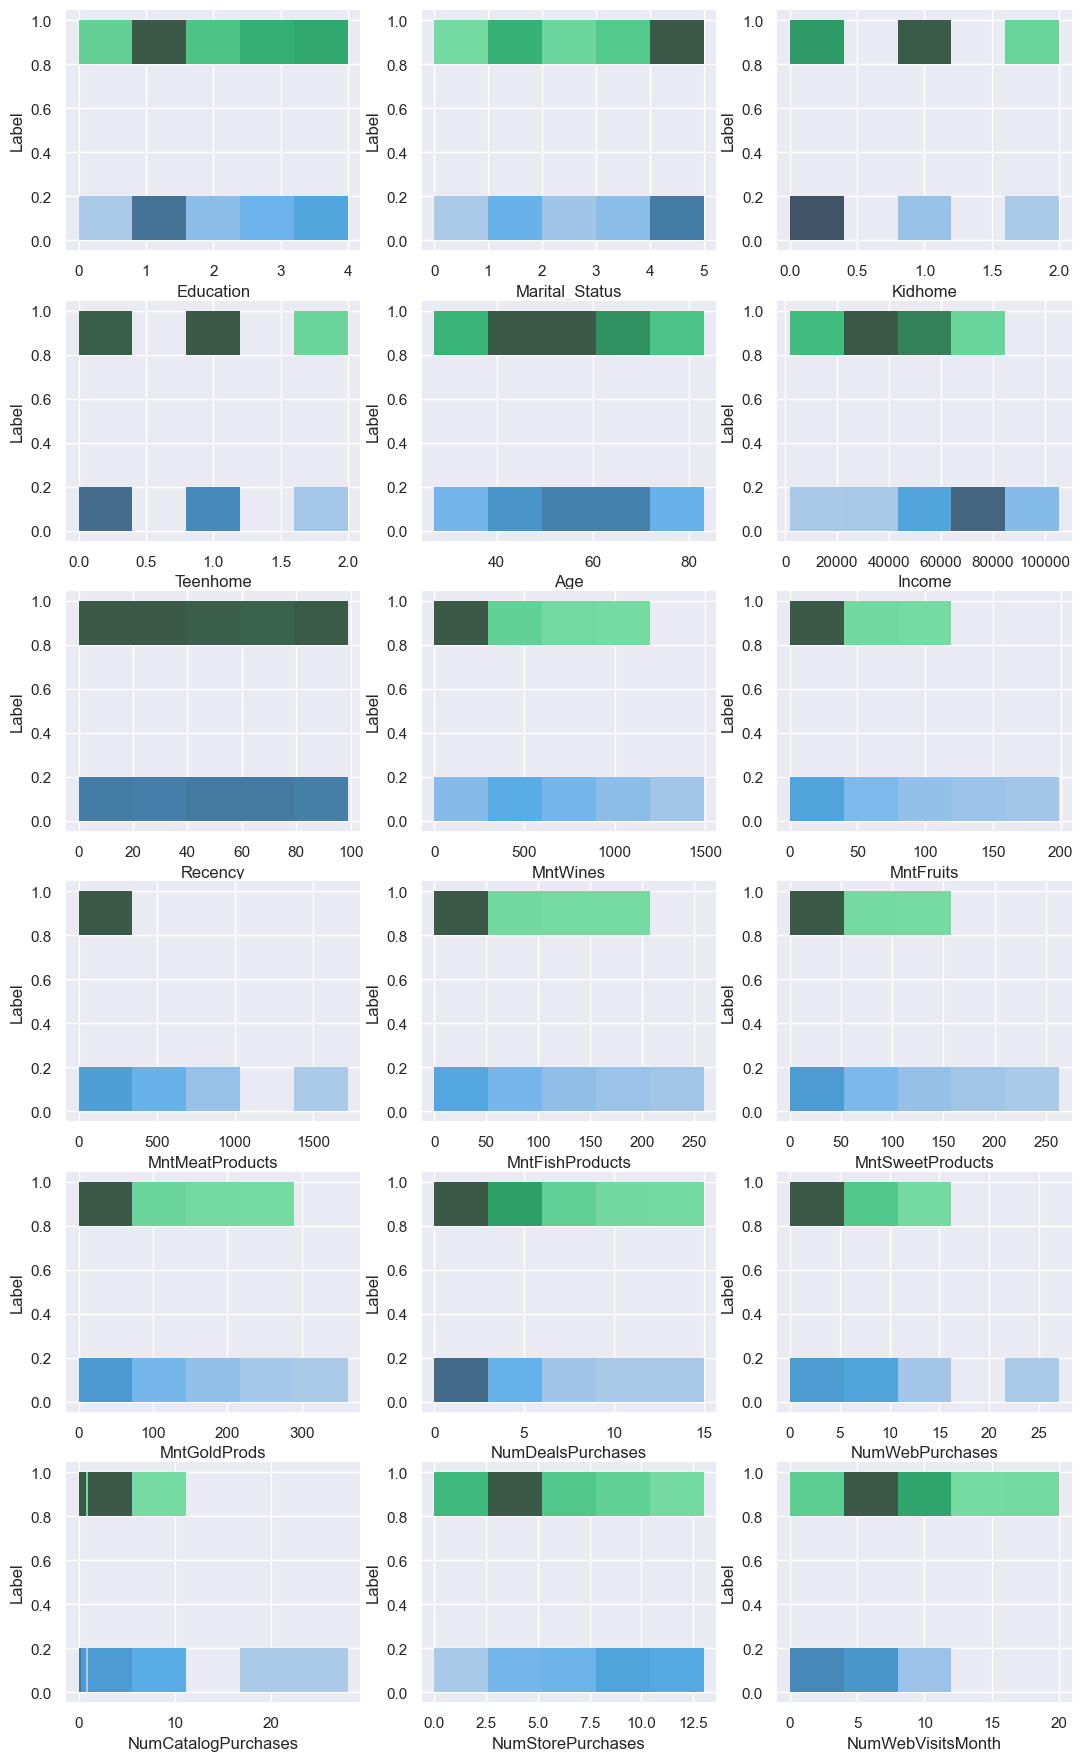

In [82]:
fig,axis = plt.subplots(6,3,figsize=(13,22))
sns.histplot(y=df01["Label"],x=df01["Education"],kde=True,hue=df01["Label"],palette="viridis",bins=5,ax=axis[0,0],legend=False)
sns.histplot(y=df01["Label"],x=df01["Marital_Status"],kde=True,hue=df01["Label"],palette="viridis",bins=5,ax=axis[0,1],legend=False)
sns.histplot(y=df01["Label"],x=df01["Kidhome"],kde=True,hue=df01["Label"],palette="viridis",bins=5,ax=axis[0,2],legend=False)
sns.histplot(y=df01["Label"],x=df01["Teenhome"],kde=True,hue=df01["Label"],palette="viridis",bins=5,ax=axis[1,0],legend=False)
sns.histplot(y=df01["Label"],x=df01["Age"],kde=True,hue=df01["Label"],palette="viridis",bins=5,ax=axis[1,1],legend=False)
sns.histplot(y=df01["Label"],x=df01["Income"],kde=True,hue=df01["Label"],palette="viridis",bins=5,ax=axis[1,2],legend=False)
sns.histplot(y=df01["Label"],x=df01["Recency"],kde=True,hue=df01["Label"],palette="viridis",bins=5,ax=axis[2,0],legend=False)
sns.histplot(y=df01["Label"],x=df01["MntWines"],kde=True,hue=df01["Label"],palette="viridis",bins=5,ax=axis[2,1],legend=False)
sns.histplot(y=df01["Label"],x=df01["MntFruits"],kde=True,hue=df01["Label"],palette="viridis",bins=5,ax=axis[2,2],legend=False)
sns.histplot(y=df01["Label"],x=df01["MntMeatProducts"],kde=True,hue=df01["Label"],palette="viridis",bins=5,ax=axis[3,0],legend=False)
sns.histplot(y=df01["Label"],x=df01["MntFishProducts"],kde=True,hue=df01["Label"],palette="viridis",bins=5,ax=axis[3,1],legend=False)
sns.histplot(y=df01["Label"],x=df01["MntSweetProducts"],kde=True,hue=df01["Label"],palette="viridis",bins=5,ax=axis[3,2],legend=False)
sns.histplot(y=df01["Label"],x=df01["MntGoldProds"],kde=True,hue=df01["Label"],palette="viridis",bins=5,ax=axis[4,0],legend=False)
sns.histplot(y=df01["Label"],x=df01["NumDealsPurchases"],kde=True,hue=df01["Label"],palette="viridis",bins=5,ax=axis[4,1],legend=False)
sns.histplot(y=df01["Label"],x=df01["NumWebPurchases"],kde=True,hue=df01["Label"],palette="viridis",bins=5,ax=axis[4,2],legend=False)
sns.histplot(y=df01["Label"],x=df01["NumCatalogPurchases"],kde=True,hue=df01["Label"],palette="viridis",bins=5,ax=axis[5,0],legend=False)
sns.histplot(y=df01["Label"],x=df01["NumStorePurchases"],kde=True,hue=df01["Label"],palette="viridis",bins=5,ax=axis[5,1],legend=False)
sns.histplot(y=df01["Label"],x=df01["NumWebVisitsMonth"],kde=True,hue=df01["Label"],palette="viridis",bins=5,ax=axis[5,2],legend=False)
sns.histplot(y=df01["Label"],x=df01["Complain"],kde=True,hue=df01["Label"],palette="viridis",bins=5,ax=axis[5,0],legend=False)

<Axes: xlabel='Recency', ylabel='NumCatalogPurchases'>

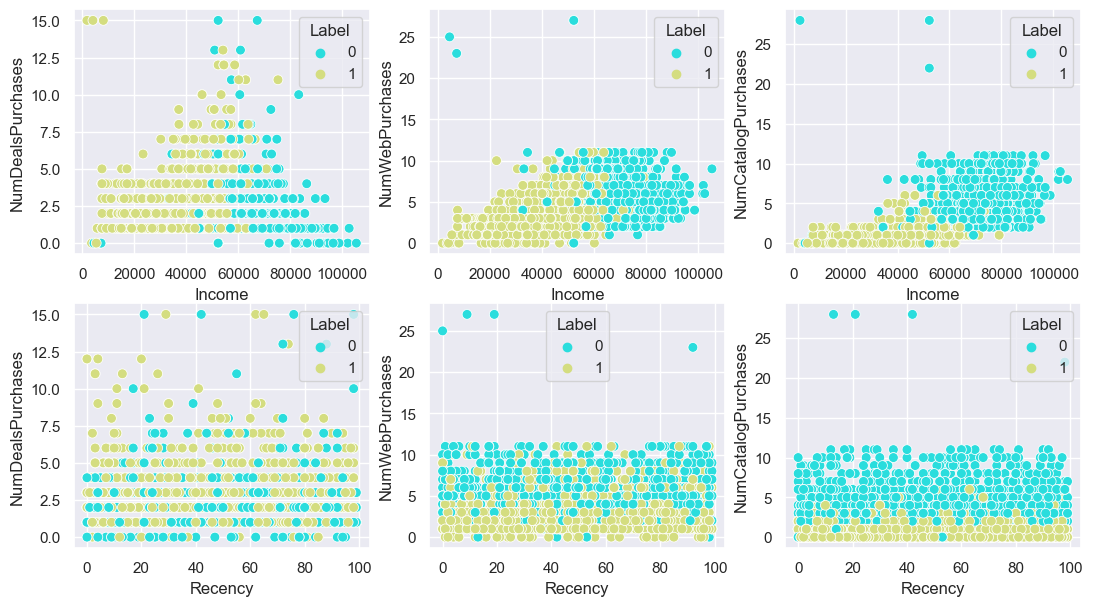

In [83]:
# erkannte cluster:
fig,axis = plt.subplots(2,3,figsize=(13,7))
sns.scatterplot(data=df01,x="Income",y="NumDealsPurchases",palette="rainbow",hue="Label",s=50,ax=axis[0,0])
sns.scatterplot(data=df01,x="Income",y="NumWebPurchases",palette="rainbow",hue="Label",s=50,ax=axis[0,1])
sns.scatterplot(data=df01,x="Income",y="NumCatalogPurchases",palette="rainbow",hue="Label",s=50,ax=axis[0,2])
sns.scatterplot(data=df01,x="Recency",y="NumDealsPurchases",palette="rainbow",hue="Label",s=50,ax=axis[1,0])
sns.scatterplot(data=df01,x="Recency",y="NumWebPurchases",palette="rainbow",hue="Label",s=50,ax=axis[1,1])
sns.scatterplot(data=df01,x="Recency",y="NumCatalogPurchases",palette="rainbow",hue="Label",s=50,ax=axis[1,2])

In [84]:
x_pca[::,0]

array([ 3.50507369, -2.30833589,  1.75837854, ...,  1.54081609,
        1.90651776, -1.88070252])

<Axes: >

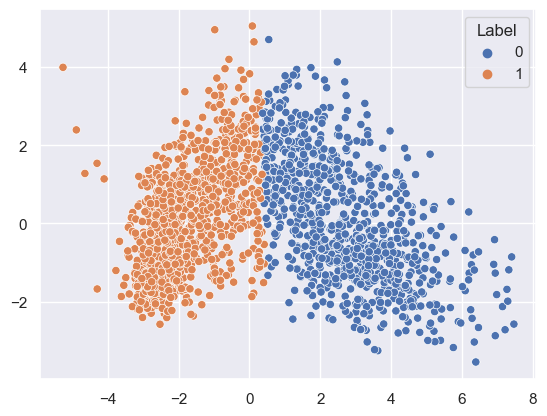

In [85]:
sns.scatterplot(x=x_pca[::,0],y=x_pca[::,1],hue=df01["Label"])